1/29/2018

# All FB and AH schools

### Summary

This notebook contains the output for the FB100 dataset and Add Health School figures, after running 'soal_script_facebook_script_1MV_2MV.py' to generate 'facebook_output_majority_vote_AUC_accuracy_Nov2017.csv', 'soal_script_facebook_script_homophily_monophily.py' to generate 'facebook_homophily_monophily_output_Williams_BetaBinom_Nov2017.csv', and 'c_add_health_script_homophily_monophily_undirected.py' to generate 'add_health_output_undirected_links_homophily_monophily_NatureHB_Nov2017.csv' (and '\*_directed_in.py' and '\*_directed_out.py' for corresponding in- and out- versions). Code organization assumes working directory is notebook folder location.


In [2]:
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## relevant libraries
execfile('../functions/python_libraries.py')

## Load FB100 dataset

In [3]:
fb = pd.read_csv('../../data/output/facebook_output_majority_vote_AUC_accuracy_Jan2018.csv')
fb_homophily_monophily = pd.read_csv('../../data/output/facebook_homophily_monophily_output_Williams_BetaBinom_Nov2017.csv')
schools = np.array(['Wellesley22', 'Smith60', 'Simmons81'])
fb_subset = fb[~np.in1d(fb.school,schools)] #%in% schools
fb_homophily_monophily = fb_homophily_monophily[~np.in1d(fb_homophily_monophily.school,schools)] #%in% schools

In [4]:
fb_hom_mon_subset = fb_subset.merge(fb_homophily_monophily, 
                left_on='school', 
                           right_on='school', 
                           how='outer')

In [5]:
color_F = 'red'
color_M = 'black'

In [6]:
print np.min(fb_hom_mon_subset.chi_square_p_value_F)
print np.max(fb_hom_mon_subset.chi_square_p_value_F)
print np.sum(fb_hom_mon_subset.chi_square_p_value_F < 10**-3) ## okay, confirmed all p-values are <10^-3
print np.sum(fb_hom_mon_subset.chi_square_p_value_M < 10**-3)
print np.sum(fb_hom_mon_subset.chi_square_p_value_F ==0) 
print np.sum(fb_hom_mon_subset.chi_square_p_value_M ==0) 


0.0
6.98025752289e-05
97
97
95
97


## Main Paper Figures Across FB100 Schools Compare Homophily and Monophily

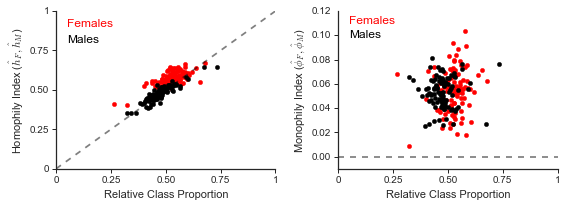

In [7]:
## combine figures
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=True,
                            figsize=(8, 3))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5)
ax1.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax1.yaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))

plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
plt.setp(ax1, yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.50', '0.75', '1'])




ax1.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_homophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=1)
ax1.annotate('Females', xy=(0.05,0.9), 
                 color=color_F, alpha=1, size=12)


ax1.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_homophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=1)
ax1.annotate('Males', xy=(0.05,0.8), 
                 color=color_M, alpha=1, size=12)

ax1.set_ylabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlabel('Relative Class Proportion')
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)




ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5)
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))



ax2.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_monophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=1)
ax2.annotate('Females', xy=(0.05,0.11), 
                 color=color_F, alpha=1, size=12)

ax2.annotate('Males', xy=(0.05,0.098), 
                 color=color_M, alpha=1, size=12)

ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)



ax2.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_monophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=1)

ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')
ax2.set_xlabel('Relative Class Proportion')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.12)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/Facebook_homophily_monophily_versus_class_proportion_Williams.pdf')
pp.savefig()
pp.close()

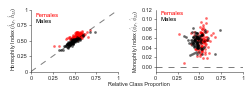

In [29]:
## combine figures
%matplotlib inline
text_size = 6
axis_text = 5.5
msize = 5
lw = 1
pad = 0.5
alpha = 0.6
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(3.46457,1.3))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5, linewidth = lw)
ax1.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax1.yaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))


plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
plt.setp(ax1, yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.50', '0.75', '1'])

ax1.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_homophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax1.annotate('Females', xy=(0.05,0.9), 
                 color=color_F, alpha=1, size=text_size)


ax1.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_homophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)
ax1.annotate('Males', xy=(0.05,0.8), 
                 color=color_M, alpha=1, size=text_size)

#ax1.set_ylabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)',size=axis_text,
#               labelpad = pad)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_linewidth(0.5)
ax1.spines["bottom"].set_linewidth(0.5)


#ax1.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax1.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                pad = 3.5,labelsize = axis_text)




ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5, linewidth = lw)
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))

plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])



ax2.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_monophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax2.annotate('Females', xy=(0.05,0.11), 
                 color=color_F, alpha=1, size=text_size)

ax2.annotate('Males', xy=(0.05,0.098), 
                 color=color_M, alpha=1, size=text_size)

ax2.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                 pad = 3.5,labelsize = axis_text)



ax2.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_monophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)

ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)',size=axis_text,
              labelpad = pad)
#ax2.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.12)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_linewidth(0.5)
ax2.spines["bottom"].set_linewidth(0.5)
plt.text(-1.7, 0.11, 'Homophily Index ($\hat{h}_F, \hat{h}_M$)', 
         fontsize=axis_text,
        rotation = 'vertical')
plt.text(-0.55, -0.04, 'Relative Class Proportion', 
         fontsize=axis_text)


plt.tight_layout()
pp = PdfPages('../../figures/Facebook_homophily_monophily_versus_class_proportion_Williams_SINGLE_COLUMN.pdf')
pp.savefig(dpi = 300)
pp.close()

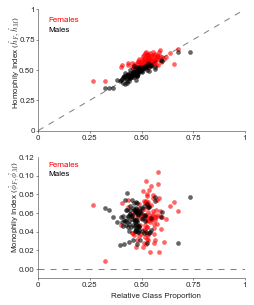

In [101]:
## combine figures
%matplotlib inline
text_size = 8
axis_text = 8
msize = 18
lw = 1
pad = 0.5
alpha = 0.6
f, (ax1, ax2) = plt.subplots(2, 1, 
                             sharey=False, sharex=False,
                            figsize=(3.46457,4.25))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5, linewidth = lw)
ax1.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax1.yaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))


plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
plt.setp(ax1, yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.50', '0.75', '1'])

ax1.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_homophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax1.annotate('Females', xy=(0.05,0.9), 
                 color=color_F, alpha=1, size=text_size)


ax1.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_homophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)
ax1.annotate('Males', xy=(0.05,0.82), 
                 color=color_M, alpha=1, size=text_size)

#ax1.set_ylabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)',size=axis_text,
#               labelpad = pad)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_linewidth(0.5)
ax1.spines["bottom"].set_linewidth(0.5)


#ax1.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax1.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                pad = 3.5,labelsize = axis_text)

ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5, linewidth = lw)
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))

plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])



ax2.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_monophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax2.annotate('Females', xy=(0.05,0.11), 
                 color=color_F, alpha=1, size=text_size)

ax2.annotate('Males', xy=(0.05,0.10), 
                 color=color_M, alpha=1, size=text_size)

ax2.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                 pad = 3.5,labelsize = axis_text)



ax2.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_monophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)

#ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)',size=axis_text,
#              labelpad = pad)
#ax2.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.12)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_linewidth(0.5)
ax2.spines["bottom"].set_linewidth(0.5)
plt.text(-0.15, 0.26, 'Homophily Index ($\hat{h}_F, \hat{h}_M$)', 
         fontsize=axis_text,
        rotation = 'vertical')

plt.text(-0.15, 0.105, 'Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)', 
         fontsize=axis_text,
        rotation = 'vertical')

plt.text(0.35, -0.03, 'Relative Class Proportion', 
         fontsize=axis_text)
#ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)',size=axis_text,
#              labelpad = pad)


plt.tight_layout()
pp = PdfPages('../../figures/Facebook_homophily_monophily_versus_class_proportion_Williams_SINGLE_COLUMN_2x1.pdf')
pp.savefig(dpi = 300)
pp.close()

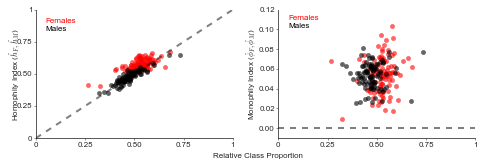

In [9]:
## combine figures
%matplotlib inline
text_size = 8
axis_text = 8
tick_label_size = 8
msize = 20
lw = 2
#pad = 0
alpha = 0.6
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(6.69291,2.3),
                            squeeze = True)

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5, linewidth = lw)
ax1.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax1.yaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))


plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
plt.setp(ax1, yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.50', '0.75', '1'])




ax1.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_homophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax1.annotate('Females', xy=(0.05,0.9), 
                 color=color_F, alpha=1, size=text_size)


ax1.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_homophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)
ax1.annotate('Males', xy=(0.05,0.835), 
                 color=color_M, alpha=1, size=text_size)

#ax1.set_ylabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)',size=axis_text,
#               labelpad = pad)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_linewidth(0.75)
ax1.spines["bottom"].set_linewidth(0.75)


#ax1.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax1.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                pad = 3.5,labelsize = axis_text)




ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5, linewidth = lw)
ax2.xaxis.set_major_locator(ticker.FixedLocator([0,0.25,0.50,0.75,1]))

plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])



ax2.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_monophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=alpha, s = msize)
ax2.annotate('Females', xy=(0.05,0.11), 
                 color=color_F, alpha=1, size=text_size)

ax2.annotate('Males', xy=(0.05,0.102), 
                 color=color_M, alpha=1, size=text_size)

ax2.tick_params('both', length=2, width=0.5, which='major', left=1, bottom=1, top=0, right=0,
                 pad = 3.5,labelsize = axis_text)
ax2.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_monophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=alpha, s = msize)

ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)',size=axis_text,
              labelpad = pad)
#ax2.set_xlabel('Relative Class Proportion',size=axis_text,
#               labelpad = pad)
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.12)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_linewidth(0.75)
ax2.spines["bottom"].set_linewidth(0.75)
f.tight_layout()
plt.text(-1.378, 0.09, 'Homophily Index ($\hat{h}_F, \hat{h}_M$)', 
         fontsize=axis_text,
        rotation = 'vertical')
#plt.subplots_adjust(left=0.5, bottom=0, right=0.5, top=0, wspace=0, hspace=0)
plt.text(-0.33, -0.03, 'Relative Class Proportion', 
         fontsize=axis_text)
pp = PdfPages('../../figures/Facebook_homophily_monophily_versus_class_proportion_Williams_DOUBLE_COLUMN.pdf')
pp.savefig(dpi = 300)
pp.close()

## Figure comparing Homophily/Monophily to AUC/Accuracy MV performance at 50% Initially Labeled

### AUC - Williams

/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


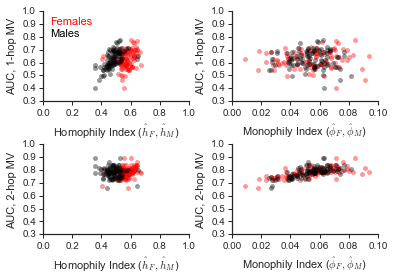

In [9]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import Grid
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

alpha_parameter = 0.4
fig = plt.figure()

grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.6, label_mode='all',
           share_all=False)
y_min = 0
y_max = 250
xlabel_block = 0.69 *100
label_loc1 = 200
label_loc2 = 170


for i in range(4):
    grid[i].tick_params('both', length=4, width=1, 
                        which='major', left=1, bottom=1, top=0, right=0)

    if i == 0: 
        grid[i].scatter(fb_hom_mon_subset.cc_homophily_F,fb_hom_mon_subset.ix[:,2],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_hom_mon_subset.cc_homophily_M,fb_hom_mon_subset.ix[:,2],
                     alpha = alpha_parameter, 
                    color='black')

        grid[i].set_ylim(0.3,1)
        grid[i].set_ylabel('AUC, 1-hop MV')
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_xlim(0,1)
        grid[i].set_xlabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
        grid[i].annotate('Females', xy=(0.05,0.9), 
                 color='red', alpha=1, size=11)
        grid[i].annotate('Males', xy=(0.05,0.8), 
                 color='black', alpha=1, size=11)



    if i == 1:
        grid[i].scatter(fb_hom_mon_subset.cc_monophily_F,fb_hom_mon_subset.ix[:,2],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_hom_mon_subset.cc_monophily_M,fb_hom_mon_subset.ix[:,2],
                     alpha = alpha_parameter, 
                    color='black')
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('AUC, 1-hop MV')
        grid[i].set_xlabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')


    if i == 2:
        grid[i].scatter(fb_hom_mon_subset.cc_homophily_F,fb_hom_mon_subset.ix[:,4],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_hom_mon_subset.cc_homophily_M,fb_hom_mon_subset.ix[:,4],
                     alpha = alpha_parameter, 
                    color='black')
        grid[i].set_ylabel('AUC, 2-hop MV')
        grid[i].set_ylim(0.3,1)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_xlabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
    if i == 3:
        grid[i].scatter(fb_hom_mon_subset.cc_monophily_F,fb_hom_mon_subset.ix[:,4],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_hom_mon_subset.cc_monophily_M,fb_hom_mon_subset.ix[:,4],
                     alpha = alpha_parameter, 
                    color='black')
        grid[i].set_xlim(0,0.1)
        grid[i].set_ylim(0.3,1)
        grid[i].set_ylabel('AUC, 2-hop MV')
        grid[i].set_xlabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)

#plt.show()
        
pp = PdfPages('../../figures/FB100_hom_mon_majority_vote_AUC_WilliamsMonophily.pdf')
pp.savefig()
pp.close()

### Descriptive Figures

In [10]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 1, width_ratios=[3])

### Supplementary Figure: Proportion of nodes with missing gender labels.

In [11]:
from __future__ import division

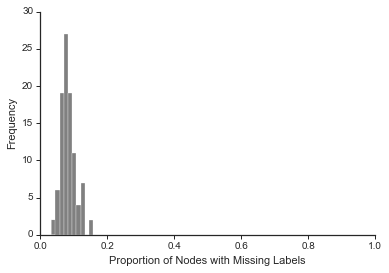

In [12]:
%matplotlib inline

ax = plt.subplot(gs[0])
ax.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

ax.hist(fb_hom_mon_subset['raw_?_count']/(fb_hom_mon_subset.raw_F_count+fb_hom_mon_subset.raw_M_count),
         color='gray',
        edgecolor='white',
        bins = 10)
ax.set_xlim(0,1)#,1)

ax.set_ylabel('Frequency')
ax.set_xlabel('Proportion of Nodes with Missing Labels')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pp = PdfPages('../../figures/Facebook_proportion_of_missing_nodes.pdf')
pp.savefig()
pp.close()

In [13]:
np.max(fb_hom_mon_subset[str(fb_hom_mon_subset.columns[3])]/(fb_hom_mon_subset.raw_F_count+fb_hom_mon_subset.raw_M_count),)


3.2562996932398041e-05

In [14]:
np.mean(fb_hom_mon_subset[str(fb_hom_mon_subset.columns[3])]/(fb_hom_mon_subset.raw_F_count+fb_hom_mon_subset.raw_M_count),)


1.9074392669902858e-06

### Supplementary Figure: Average node degree among nodes in the largest connected component 

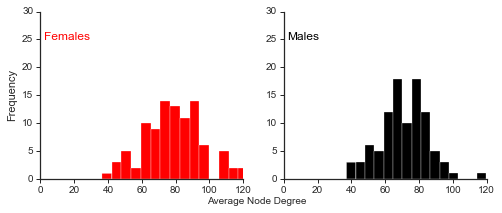

In [15]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

ax1.hist(fb_hom_mon_subset.cc_average_degree_F,color=color_F,
        edgecolor='white',bins=15)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(0,120)
ax1.set_ylim(0,30)
ax1.set_ylabel('Frequency')
ax1.annotate('Females', xy=(2,25), 
                 color=color_F, alpha=1, size=12)

ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax2.hist(fb_hom_mon_subset.cc_average_degree_M,color=color_M,edgecolor='white',
        bins=15)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlim(0,120)
ax2.set_ylim(0,30)
ax2.annotate('Males', xy=(2,25), 
                 color=color_M, alpha=1, size=12)

ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


f.text(0.5, 0.01, 'Average Node Degree', ha='center',size=10)


pp = PdfPages('../../figures/Facebook_average_node_degree.pdf')
pp.savefig()
pp.close()

### Supplementary Figure: Relative proportion of the original nodes preserved after subsetting to the largest connected component

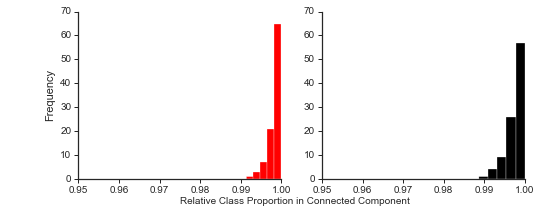

In [16]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

ax1.hist(fb_hom_mon_subset.cc_F_count/fb_hom_mon_subset.raw_F_count,color=color_F,
        edgecolor='white',bins=5)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(0.95,1)
ax1.set_ylim(0,70)
ax1.set_ylabel('Frequency')
ax1.annotate('Females', xy=(0.755,90), 
                 color=color_F, alpha=1, size=12)
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


ax2.hist(fb_hom_mon_subset.cc_M_count/fb_hom_mon_subset.raw_M_count,color=color_M,edgecolor='white',
        bins=5)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlim(0.95,1)
ax2.set_ylim(0,70)

ax2.annotate('Males', xy=(0.755,90), 
                 color=color_M, alpha=1, size=12)
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

f.text(0.5, 0.01, 'Relative Class Proportion in Connected Component', ha='center',size=10)
pp = PdfPages('../../figures/Facebook_proportion_in_connected_component.pdf')
pp.savefig()
pp.close()

### Supplementary Figure: Comparison of Homophily Indices.

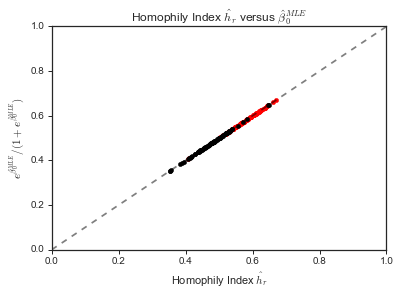

In [17]:
%matplotlib inline
plt.plot( [0,1],[0,1] ,'k--',alpha=0.5)

plt.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)


plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fb_hom_mon_subset.cc_homophily_F,
           fb_hom_mon_subset.b0_glm_F, color=color_F)
plt.scatter(fb_hom_mon_subset.cc_homophily_M,
           fb_hom_mon_subset.b0_glm_M, color=color_M)
plt.xlabel('Homophily Index $\hat{h}_r$')
plt.ylabel('$e^{\hat{\\beta}_0^{MLE}} / (1+ e^{\hat{\\beta}_0^{MLE}}) $')
plt.title('Homophily Index $\hat{h}_r$ versus $\hat{\\beta}_0^{MLE}$')
pp = PdfPages('../../figures/Facebook_MLE_beta0_versus_homophily_index_Williams.pdf')
pp.savefig()
pp.close()

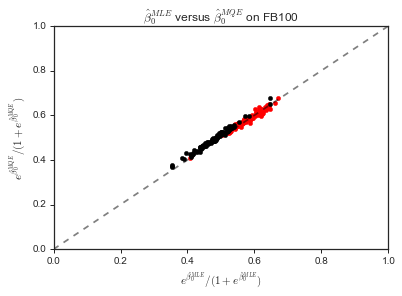

In [18]:
%matplotlib inline
plt.plot( [0,1],[0,1] ,'k--',alpha=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

plt.scatter(fb_hom_mon_subset.b0_glm_F,
           fb_hom_mon_subset.b0_dispmod_glm_F, color=color_F)
plt.scatter(fb_hom_mon_subset.b0_glm_M,
           fb_hom_mon_subset.b0_dispmod_glm_M, color=color_M)
plt.ylabel('$e^{\hat{\\beta}_0^{MQE}} / (1+ e^{\hat{\\beta}_0^{MQE}}) $')

plt.xlabel('$e^{\hat{\\beta}_0^{MLE}} / (1+ e^{\hat{\\beta}_0^{MLE}}) $')

plt.title('$\hat{\\beta}_0^{MLE}$ versus $\hat{\\beta}_0^{MQE}$ on FB100')
pp = PdfPages('../../figures/Facebook_MLE_beta0_versus_Williams_beta0_index_Williams.pdf')
pp.savefig()
pp.close()

# Add Health

In [19]:
ah_hom_mon_un = pd.read_csv('../../data/output/add_health_output_undirected_links_homophily_monophily_NatureHB_Nov2017.csv')
ah_hom_mon = pd.read_csv('../../data/output/add_health_output_in_directed_links_homophily_monophily_NatureHB_Nov2017.csv')
ah_hom_mon_out = pd.read_csv('../../data/output/add_health_output_out_directed_links_homophily_monophily_NatureHB_Nov2017.csv')

In [20]:
schools = np.array(['comm27'])
ah_hom_mon_un = ah_hom_mon_un[~np.in1d(ah_hom_mon_un.school,schools)] #%in% schools
ah_hom_mon = ah_hom_mon[~np.in1d(ah_hom_mon.school,schools)] #%in% schools
ah_hom_mon_out = ah_hom_mon_out[~np.in1d(ah_hom_mon_out.school,schools)] #%in% schools

In [21]:
color_F = 'red'
color_M = 'black'

In [22]:
#compute p-values on in-degrees
print 'AH p-value counts < 10^-3'
print 'F: '+str(np.sum(ah_hom_mon.chi_square_p_value_F < 10**-3) )
print 'M: '+ str(np.sum(ah_hom_mon.chi_square_p_value_M < 10**-3))
print ''
print 'AH p-value counts < 0.01'
print 'F: '+str(np.sum(ah_hom_mon.chi_square_p_value_F < 0.01) )
print 'M: '+ str(np.sum(ah_hom_mon.chi_square_p_value_M < 0.01))


AH p-value counts < 10^-3
F: 35
M: 63

AH p-value counts < 0.01
F: 50
M: 66


### Supplementary Figure: Homophily and Monophily

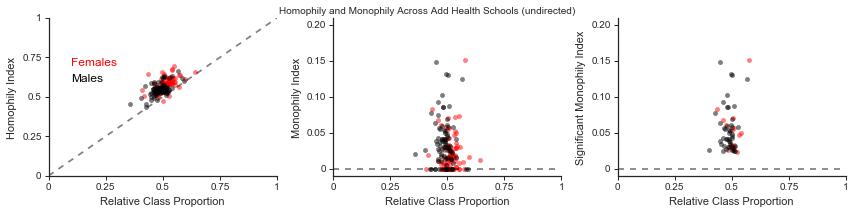

In [23]:
%matplotlib inline

f, (ax1, ax2,ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=True,
                            figsize=(12, 3))
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.5', '0.75', '1'])
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, 0.2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])
plt.setp(ax3, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, .2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])

ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

ax1.set_xlabel('Relative Class Proportion')
ax2.set_xlabel('Relative Class Proportion')
ax3.set_xlabel('Relative Class Proportion')


ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5)


ax1.scatter(ah_hom_mon_un.ratio_F[ah_hom_mon_un.cc_average_degree_F>0],
           ah_hom_mon_un.cc_homophily_F[ah_hom_mon_un.cc_average_degree_F>0],
            color=color_F,alpha=0.5)
ax1.scatter(1-ah_hom_mon_un.ratio_F[ah_hom_mon_un.cc_average_degree_M>0],
           ah_hom_mon_un.cc_homophily_M[ah_hom_mon_un.cc_average_degree_M>0],
           color=color_M,alpha=0.5)
ax1.annotate('Males', xy=(0.1,0.6), 
                 color=color_M, alpha=1, size=12)
ax1.annotate('Females', xy=(0.1,0.7), 
                 color=color_F, alpha=1, size=12)


ax1.set_ylabel('Homophily Index')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5)

ax2.scatter(ah_hom_mon_un.ratio_F[ah_hom_mon_un.cc_average_degree_F>0],
           ah_hom_mon_un.cc_monophily_F_beta_binom[ah_hom_mon_un.cc_average_degree_F>0],
            color=color_F,alpha=0.5)


ax2.scatter(1-ah_hom_mon_un.ratio_F[ah_hom_mon_un.cc_average_degree_M>0],
           ah_hom_mon_un.cc_monophily_M_beta_binom[ah_hom_mon_un.cc_average_degree_M>0],
           color=color_M,alpha=0.5)

ax2.set_ylabel('Monophily Index')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.21)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax3.plot( [0,1],[0,0] ,'k--',alpha=0.5)


ax3.scatter(ah_hom_mon_un.ratio_F[ah_hom_mon_un.chi_square_p_value_F<0.001],
           ah_hom_mon_un.cc_monophily_F_beta_binom[ah_hom_mon_un.chi_square_p_value_F<0.001],
            color=color_F,alpha=0.5)


ax3.scatter(1-ah_hom_mon_un.ratio_F[ah_hom_mon_un.chi_square_p_value_M<0.001],
           ah_hom_mon_un.cc_monophily_M_beta_binom[ah_hom_mon_un.chi_square_p_value_M<0.001],
           color=color_M,alpha=0.5)

ax3.set_ylabel('Significant Monophily Index')
ax3.set_xlim(0,1)
ax3.set_ylim(-0.01,0.21)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
plt.tight_layout()
f.text(0.5, 0.95, 'Homophily and Monophily Across Add Health Schools (undirected)', ha='center',size=10)
pp = PdfPages('../../figures/AddHealth_homophily_monophily_undirected_versus_class_proportion.pdf')
pp.savefig()
pp.close()

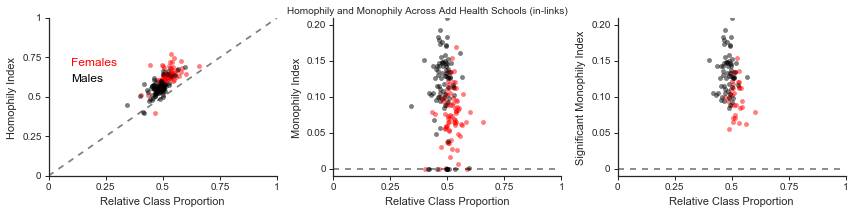

In [24]:
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=True,
                            figsize=(12, 3))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5)
plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.5', '0.75', '1'])
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, 0.2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])
plt.setp(ax3, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, .2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])

ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax1.set_xlabel('Relative Class Proportion')
ax2.set_xlabel('Relative Class Proportion')
ax3.set_xlabel('Relative Class Proportion')


ax1.scatter(ah_hom_mon.ratio_F[ah_hom_mon.cc_average_degree_F>0],
           ah_hom_mon.cc_homophily_F[ah_hom_mon.cc_average_degree_F>0],
            color=color_F,alpha=0.5)
ax1.scatter(1-ah_hom_mon.ratio_F[ah_hom_mon.cc_average_degree_M>0],
           ah_hom_mon.cc_homophily_M[ah_hom_mon.cc_average_degree_M>0],
           color=color_M,alpha=0.5)
ax1.annotate('Males', xy=(0.1,0.6), 
                 color=color_M, alpha=1, size=12)
ax1.annotate('Females', xy=(0.1,0.7), 
                 color=color_F, alpha=1, size=12)


ax1.set_ylabel('Homophily Index')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5)

ax2.scatter(ah_hom_mon.ratio_F[ah_hom_mon.cc_average_degree_F>0],
           ah_hom_mon.cc_monophily_F_beta_binom[ah_hom_mon.cc_average_degree_F>0],
            color=color_F,alpha=0.5)


ax2.scatter(1-ah_hom_mon.ratio_F[ah_hom_mon.cc_average_degree_M>0],
           ah_hom_mon.cc_monophily_M_beta_binom[ah_hom_mon.cc_average_degree_M>0],
           color=color_M,alpha=0.5)

ax2.set_ylabel('Monophily Index')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.21)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

ax3.plot( [0,1],[0,0] ,'k--',alpha=0.5)


ax3.scatter(ah_hom_mon.ratio_F[ah_hom_mon.chi_square_p_value_F<0.001],
           ah_hom_mon.cc_monophily_F_beta_binom[ah_hom_mon.chi_square_p_value_F<0.001],
            color=color_F,alpha=0.5)


ax3.scatter(1-ah_hom_mon.ratio_F[ah_hom_mon.chi_square_p_value_M<0.001],
           ah_hom_mon.cc_monophily_M_beta_binom[ah_hom_mon.chi_square_p_value_M<0.001],
           color=color_M,alpha=0.5)

ax3.set_ylabel('Significant Monophily Index')
ax3.set_xlim(0,1)
ax3.set_ylim(-0.01,0.21)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

plt.tight_layout()
f.text(0.5, 0.95, 'Homophily and Monophily Across Add Health Schools (in-links)', ha='center',size=10)
pp = PdfPages('../../figures/AddHealth_homophily_monophily_indirected_versus_class_proportion.pdf')
pp.savefig()
pp.close()

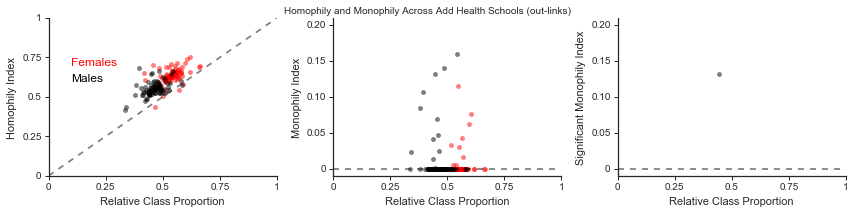

In [25]:
## combine figures
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=True,
                            figsize=(12, 3))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5)

plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.5', '0.75', '1'])
plt.setp(ax2, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, 0.2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])
plt.setp(ax3, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.5', '0.75', '1'],
        yticks=[0,0.05, 0.1, 0.15, .2], yticklabels=['0','0.05', '0.10', '0.15', '0.20'])

ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax1.set_xlabel('Relative Class Proportion')
ax2.set_xlabel('Relative Class Proportion')
ax3.set_xlabel('Relative Class Proportion')


ax1.scatter(ah_hom_mon_out.ratio_F[ah_hom_mon_out.cc_average_degree_F>0],
           ah_hom_mon_out.cc_homophily_F[ah_hom_mon_out.cc_average_degree_F>0],
            color=color_F,alpha=0.5)
#ax1.annotate('Females', xy=(0.1,0.7), 
#                 color=color_F, alpha=1, size=12)
ax1.annotate('Males', xy=(0.1,0.6), 
                 color=color_M, alpha=1, size=12)
ax1.annotate('Females', xy=(0.1,0.7), 
                 color=color_F, alpha=1, size=12)
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)




ax1.scatter(1-ah_hom_mon_out.ratio_F[ah_hom_mon_out.cc_average_degree_M>0],
           ah_hom_mon_out.cc_homophily_M[ah_hom_mon_out.cc_average_degree_M>0],
           color=color_M,alpha=0.5)
#ax1.annotate('Males', xy=(0.1,0.6), 
#                 color=color_M, alpha=1, size=12)

ax1.set_ylabel('Homophily Index')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5)

ax2.scatter(ah_hom_mon_out.ratio_F[ah_hom_mon_out.cc_average_degree_F>0],
           ah_hom_mon_out.cc_monophily_F_beta_binom[ah_hom_mon_out.cc_average_degree_F>0],
            color=color_F,alpha=0.5)


ax2.scatter(1-ah_hom_mon_out.ratio_F[ah_hom_mon_out.cc_average_degree_M>0],
           ah_hom_mon_out.cc_monophily_M_beta_binom[ah_hom_mon_out.cc_average_degree_M>0],
           color=color_M,alpha=0.5)

ax2.set_ylabel('Monophily Index')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.21)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)


ax3.plot( [0,1],[0,0] ,'k--',alpha=0.5)


ax3.scatter(ah_hom_mon_out.ratio_F[ah_hom_mon_out.chi_square_p_value_F<0.001],
           ah_hom_mon_out.cc_monophily_F_beta_binom[ah_hom_mon_out.chi_square_p_value_F<0.001],
            color=color_F,alpha=0.5)


ax3.scatter(1-ah_hom_mon_out.ratio_F[ah_hom_mon_out.chi_square_p_value_M<00.001],
           ah_hom_mon_out.cc_monophily_M_beta_binom[ah_hom_mon_out.chi_square_p_value_M<0.001],
           color=color_M,alpha=0.5)

ax3.set_ylabel('Significant Monophily Index')
ax3.set_xlim(0,1)
ax3.set_ylim(-0.01,0.21)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

plt.tight_layout()
f.text(0.5, 0.95, 'Homophily and Monophily Across Add Health Schools (out-links)', ha='center',size=10)
pp = PdfPages('../../figures/AddHealth_homophily_monophily_outdirected_versus_class_proportion.pdf')
pp.savefig()
pp.close()